In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\archive (1)\\Trojan_Detection.csv", sep = r',', skipinitialspace = True)

In [3]:
df.drop(columns = df.columns[0], axis = 1, inplace= True)

In [4]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
1,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
4,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,10,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign


In [5]:
df = df.dropna()
df = df.replace("Trojan", 1)
df = df.replace("Benign", 0)

df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,10,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


#this code is converting categorical data (specifically, "Flow ID", "Source IP", "Destination IP", and "Timestamp") into numerical format using label encoding. This can be useful for certain machine learning algorithms that require numerical input.

In [6]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
df["Flow ID"] = number.fit_transform(df["Flow ID"])
df["Source IP"] = number.fit_transform(df["Source IP"])
df["Destination IP"] = number.fit_transform(df["Destination IP"])
df["Timestamp"] = number.fit_transform(df["Timestamp"])
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,46111,7,49975,352,80,6,36269,10743584,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,74905,7,49169,895,443,17,39241,254217,6,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,9217,7,37749,7,53,17,42069,1023244,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10418,7,41352,7,53,17,29885,286483,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,20763,5,44353,220,443,6,16589,65633087,12,10,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


In [7]:
df.dtypes

Flow ID               int32
Source IP             int32
Source Port           int64
Destination IP        int32
Destination Port      int64
                     ...   
Idle Mean           float64
Idle Std            float64
Idle Max            float64
Idle Min            float64
Class                 int64
Length: 85, dtype: object

In [8]:
df["Timestamp"]

0         36269
1         39241
2         42069
3         29885
4         16589
          ...  
177477    29969
177478    38763
177479    32912
177480    26598
177481    15700
Name: Timestamp, Length: 177482, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(["Class"], axis = 1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((141985, 84), (35497, 84), (141985,), (35497,))

In [11]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([4.57357127e-01, 1.25702703e-01, 1.01922163e-01, 1.22528862e-01,
       1.68042333e-02, 1.02993900e-02, 6.91606296e-01, 4.29960681e-02,
       4.51715888e-03, 3.99415023e-03, 4.46702412e-02, 4.90194974e-02,
       4.09231981e-02, 6.30733782e-03, 4.54693297e-02, 4.57229651e-02,
       2.85006242e-02, 1.50818869e-02, 5.20911346e-02, 4.54848568e-02,
       1.95340210e-02, 3.81330455e-02, 3.62276770e-02, 1.38592715e-02,
       4.45091157e-02, 3.51375128e-02, 3.39746693e-02, 3.22878032e-02,
       1.39273640e-02, 3.19276505e-02, 3.20207833e-02, 1.45647741e-02,
       1.22600603e-02, 1.16667688e-02, 1.47692819e-02, 1.64878439e-02,
       3.79095931e-04, 0.00000000e+00, 2.76708279e-04, 1.33413481e-03,
       7.33133039e-03, 1.13692164e-02, 3.90087334e-02, 2.18149722e-02,
       8.54378410e-03, 3.59538180e-02, 5.30496616e-02, 5.14082519e-02,
       5.32361261e-02, 0.00000000e+00, 2.32417145e-03, 0.00000000e+00,
       2.71046538e-03, 5.23964180e-03, 1.37701214e-03, 0.00000000e+00,
      

In [12]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Timestamp             0.691606
Flow ID               0.457357
Source IP             0.125703
Destination IP        0.122529
Source Port           0.101922
                        ...   
FIN Flag Count        0.000000
CWE Flag Count        0.000000
Bwd Avg Bytes/Bulk    0.000000
Fwd Avg Bulk Rate     0.000000
Fwd Avg Bytes/Bulk    0.000000
Length: 84, dtype: float64

<AxesSubplot:>

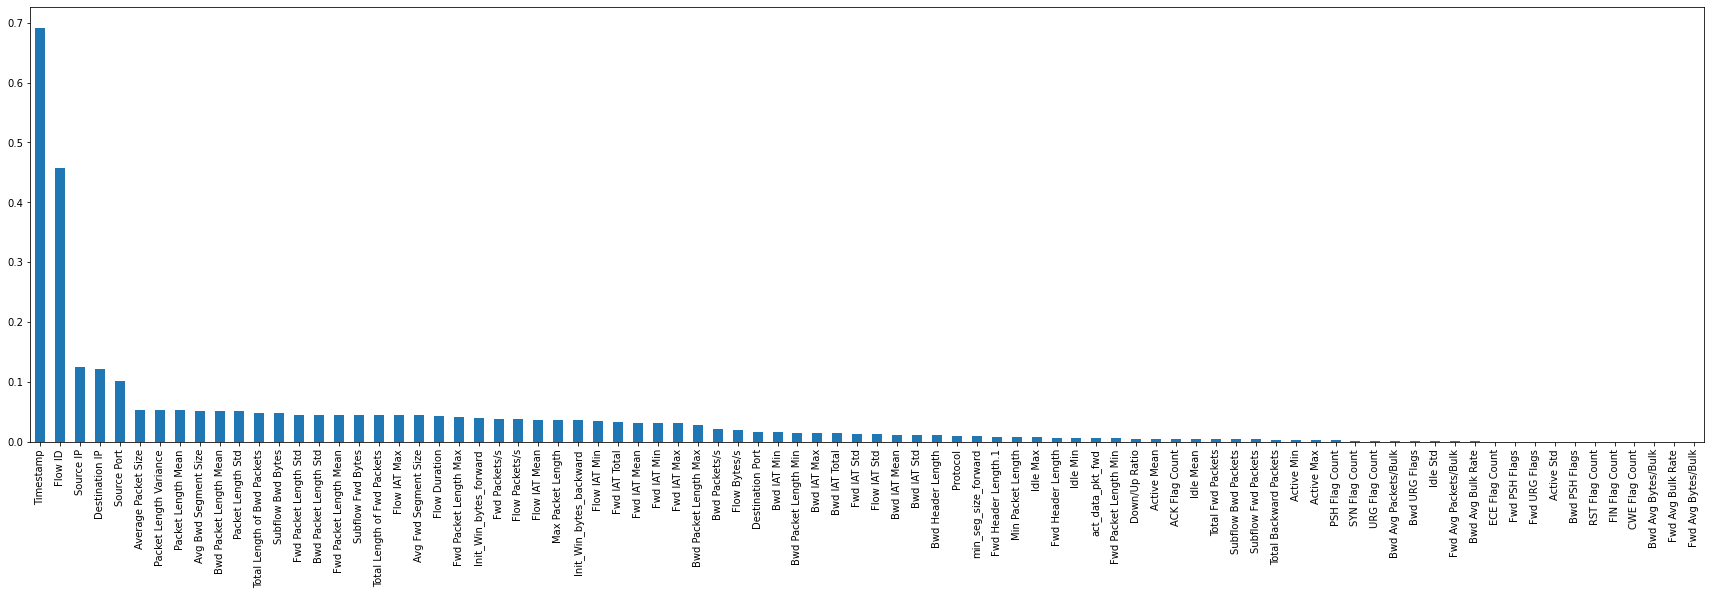

In [13]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(30,8))

In [14]:
# Now we select the top features.
from sklearn.feature_selection import SelectKBest
sel_seven_cols = SelectKBest(mutual_info_classif, k=10)
sel_seven_cols.fit(X_train, y_train)
cols = X_train.columns[sel_seven_cols.get_support()]

In [15]:
use_col = list(cols)
use_col.append("Class")

In [16]:
data = df[use_col]

In [17]:
data

,Flow ID,Source IP,Source Port,Destination IP,Timestamp,Packet Length Mean,Packet Length Std,Packet Length Variance,Average Packet Size,Avg Bwd Segment Size,Class
0,46111,7,49975,352,36269,116.000000,242.090892,58608.000000,130.500000,168.000000,1
1,74905,7,49169,895,39241,699.071429,647.514356,419274.840659,752.846154,749.428571,1
2,9217,7,37749,7,42069,79.666667,86.025190,7400.333333,119.500000,179.000000,0
3,10418,7,41352,7,29885,62.000000,38.105118,1452.000000,93.000000,106.000000,1
4,20763,5,44353,220,16589,277.782609,496.257444,246271.450593,290.409091,562.200000,0
...,...,...,...,...,...,...,...,...,...,...,...
177477,54441,7,60811,2817,29969,0.000000,0.000000,0.000000,0.000000,0.000000,1
177478,52664,7,33004,2512,38763,0.000000,0.000000,0.000000,0.000000,0.000000,1
177479,76988,7,51049,943,32912,312.117647,488.342590,238478.485294,331.625000,634.142857,1
177480,30452,6,9145,7,26598,50.333333,23.094011,533.333333,75.500000,77.000000,1


In [18]:
from sklearn.model_selection import train_test_split
X = data.drop("Class", axis = 1) #This line creates a new DataFrame X by dropping the column labeled "Class" from the DataFrame data. 
y = data["Class"] #This line creates a Series y containing only the "Class" column from the DataFrame data. 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # 20 perecnt testing 80% training
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((141985, 10), (35497, 10), (141985,), (35497,))

# **Random Forest classifier**

In [19]:
import numpy as np  # Import NumPy

In [20]:
from sklearn.ensemble import RandomForestClassifier
# Setup random seed
np.random.seed(42)
clf = RandomForestClassifier(n_estimators = 50) #50 trees (estimators). The n_estimators parameter controls how many trees will be used in the forest.
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9998309716314054

In [21]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17321
           1       1.00      1.00      1.00     18176

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497



In [23]:
# Imporve model.
# Try different amount on n_estimators
import numpy as np
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set : {clf.score(X_test,y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set : 99.98%
 
Trying model with 20 estimators...
Model accuracy on test set : 99.98%
 
Trying model with 30 estimators...
Model accuracy on test set : 99.99%
 
Trying model with 40 estimators...
Model accuracy on test set : 99.98%
 
Trying model with 50 estimators...
Model accuracy on test set : 99.98%
 
Trying model with 60 estimators...
Model accuracy on test set : 99.99%
 
Trying model with 70 estimators...
Model accuracy on test set : 99.99%
 
Trying model with 80 estimators...
Model accuracy on test set : 99.99%
 
Trying model with 90 estimators...
Model accuracy on test set : 99.99%
 


In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf, X, y)
np.mean(cross_val_score)

0.9998985810740837

# **AdaBoost classifier**

In [ ]:
#This code is following a conventional train-test split approach. It fits the model to 
#a portion of the data (training set) and then assesses its performance on a separate, previously unseen 
#portion of the data (test set).
from sklearn.ensemble import AdaBoostClassifier

# Setup random seed
np.random.seed(42)
Aclf = AdaBoostClassifier(n_estimators=100)
Aclf.fit(X_train,y_train)
Aclf.score(X_test,y_test)

In [28]:
#using cross-validation to obtain a more robust estimate of the model's 
#performance by systematically testing it on different subsets of the data.
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(Aclf, X, y)
np.mean(cross_val_score)

0.9999436565755486

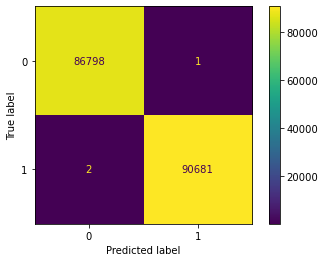

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=Aclf, X=X,y=y)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
Gclf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
Gclf.score(X_test,y_test)

0.9999154858157028

# **GaussianNB Classifier**

### Fitting the data into the model.

In [31]:
from sklearn.naive_bayes import GaussianNB
# Setup random seed
np.random.seed(42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

Evaluating the model using `score()` method

In [32]:
print(f"Model accuracy on test set using score method : {gnb.score(X_test,y_test) * 100:.2f}%")


Model accuracy on test set using score method : 90.57%


In [33]:
y_preds = gnb.predict(X_test)
y_preds

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

### Evlauating the model using Cross-validation method to avoid overfitting

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(gnb, X, y)
print(f"Model accuracy on test set using Cross-validation method : {np.mean(cross_val_score) * 100:.2f}%")

Model accuracy on test set using Cross-validation method : 90.40%


### Confusion matrix

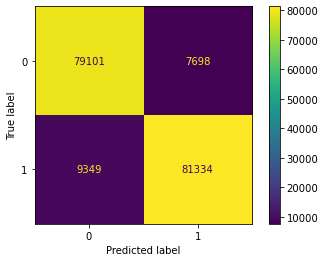

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=gnb, X=X,y=y)

### Model Evaluation: Area under the reciever operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve
* ROC curves are a comparison of a model's true positive rate (tpr) versuss a models false positive rate (fpr).

- True possitve = model predicts 1 when truth is 1.
- False possitive = model predicts 1 when truth is 0.
- True negative = model predicts 0 when truth is 0.
- False negative = model predicts 0 when truth is 1

In [36]:
# Make predictions with probabilities
y_probs = gnb.predict_proba(X_test)
y_probs[:10]

array([[9.97123651e-01, 2.87634900e-03],
       [9.99565325e-01, 4.34674797e-04],
       [4.08456714e-01, 5.91543286e-01],
       [6.38789464e-02, 9.36121054e-01],
       [5.15371567e-01, 4.84628433e-01],
       [5.90309068e-02, 9.40969093e-01],
       [9.97280781e-01, 2.71921899e-03],
       [3.27420790e-01, 6.72579210e-01],
       [9.99209966e-01, 7.90033995e-04],
       [9.36898787e-01, 6.31012127e-02]])

In [37]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([2.87634900e-03, 4.34674797e-04, 5.91543286e-01, 9.36121054e-01,
       4.84628433e-01, 9.40969093e-01, 2.71921899e-03, 6.72579210e-01,
       7.90033995e-04, 6.31012127e-02])

In [38]:
# Claculate fpr, tpr and thresholds.
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.00000000e+00, 0.00000000e+00, 2.30933549e-04, ...,
       9.50407020e-01, 9.50522487e-01, 1.00000000e+00])

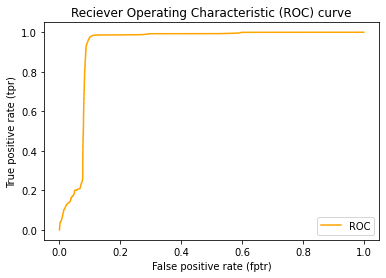

In [39]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color = "orange", label="ROC")
    
    #Customize the plot.
    plt.xlabel("False positive rate (fptr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [40]:
from sklearn.metrics import roc_auc_score
print(f"Model accuracy on test set using reciver operating characteristic score method : {roc_auc_score(y_test, y_probs_positive) * 100:.2f}%")


Model accuracy on test set using reciver operating characteristic score method : 92.65%


## Classification Report for **GaussianNB Classifier**

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     17321
           1       0.92      0.90      0.91     18176

    accuracy                           0.91     35497
   macro avg       0.91      0.91      0.91     35497
weighted avg       0.91      0.91      0.91     35497



# Deep learning (Feed forward neural network)

In [42]:
pip install tensorflow

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [46]:
dataset_path = "C:\\Users\\Dell\\Downloads\\archive (1)\\Trojan_Detection.csv"
df = pd.read_csv(dataset_path, sep=',', skipinitialspace=True)
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [47]:
df = df.dropna()
df = df.replace("Trojan", 1)
df = df.replace("Benign", 0)

In [48]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df["Flow ID"] = number.fit_transform(df["Flow ID"])
df["Source IP"] = number.fit_transform(df["Source IP"])
df["Destination IP"] = number.fit_transform(df["Destination IP"])
df["Timestamp"] = number.fit_transform(df["Timestamp"])

In [49]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1775/1775 [==============================] - 5s 3ms/step - loss: 0.1936 - accuracy: 0.9399 - val_loss: 0.1116 - val_accuracy: 0.9695
Epoch 2/10
1775/1775 [==============================] - 5s 3ms/step - loss: 0.1020 - accuracy: 0.9703 - val_loss: 0.1007 - val_accuracy: 0.9698
Epoch 3/10
1775/1775 [==============================] - 4s 2ms/step - loss: 0.0829 - accuracy: 0.9747 - val_loss: 0.0738 - val_accuracy: 0.9787
Epoch 4/10
1775/1775 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9785 - val_loss: 0.0708 - val_accuracy: 0.9767
Epoch 5/10
1775/1775 [==============================] - 5s 3ms/step - loss: 0.0621 - accuracy: 0.9798 - val_loss: 0.0583 - val_accuracy: 0.9815
Epoch 6/10
1775/1775 [==============================] - 5s 3ms/step - loss: 0.0561 - accuracy: 0.9817 - val_loss: 0.0562 - val_accuracy: 0.9812
Epoch 7/10
1775/1775 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 0.0524 - val_accuracy:

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

1110/1110 [==============================] - 2s 1ms/step - loss: 0.0492 - accuracy: 0.9845
Test loss: 0.0492, Test accuracy: 0.9845


In [56]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

1110/1110 [==============================] - 1s 1ms/step


In [57]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17282
           1       0.99      0.98      0.98     18215

    accuracy                           0.98     35497
   macro avg       0.98      0.98      0.98     35497
weighted avg       0.98      0.98      0.98     35497



# Hybrid model (StackingClassifier with RandomForestClassifier and GradientBoostingClassifier as base models, and LogisticRegression as the meta-model)

A Stacking Classifier is an ensemble learning technique that combines the predictions of multiple models. In this case, it uses RandomForestClassifier and GradientBoostingClassifier as base models, and LogisticRegression as the meta-model to make final predictions. This approach can often lead to improved predictive accuracy compared to using individual models on their own.

In [1]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
# Load and preprocess the dataset (assuming df, X, y, scaler are not defined yet)
dataset_path = "C:\\Users\\Dell\\Downloads\\archive (1)\\Trojan_Detection.csv"
df = pd.read_csv(dataset_path, sep=',', skipinitialspace=True)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df = df.dropna()
df = df.replace("Trojan", 1)
df = df.replace("Benign", 0)

In [3]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df["Flow ID"] = number.fit_transform(df["Flow ID"])
df["Source IP"] = number.fit_transform(df["Source IP"])
df["Destination IP"] = number.fit_transform(df["Destination IP"])
df["Timestamp"] = number.fit_transform(df["Timestamp"])

In [4]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Define base models
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100)),
    ('gradient_boosting', GradientBoostingClassifier())
]

In [6]:
# Define meta-model
meta_model = LogisticRegression()

In [7]:
# Create stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [ ]:
# Train the model
stacked_model.fit(X_train, y_train)

In [12]:
# Make predictions
y_pred = stacked_model.predict(X_test)

In [13]:
# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17282
           1       1.00      1.00      1.00     18215

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497



# Hybrid model ( Voting Classifier with a combination of  RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier and SVC)

 if you have a Voting Classifier with the models you mentioned, it will take the predictions from each of the four models (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, and SVC) and use a voting mechanism to determine the final prediction.

In [14]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [15]:
# Load and preprocess the dataset (assuming df, X, y, scaler are not defined yet)
dataset_path = "C:\\Users\\Dell\\Downloads\\archive (1)\\Trojan_Detection.csv"
df = pd.read_csv(dataset_path, sep=',', skipinitialspace=True)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df = df.dropna()
df = df.replace("Trojan", 1)
df = df.replace("Benign", 0)

In [16]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df["Flow ID"] = number.fit_transform(df["Flow ID"])
df["Source IP"] = number.fit_transform(df["Source IP"])
df["Destination IP"] = number.fit_transform(df["Destination IP"])
df["Timestamp"] = number.fit_transform(df["Timestamp"])

In [17]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Define base models
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100)),
    ('gradient_boosting', GradientBoostingClassifier()),
    ('adaboost', AdaBoostClassifier()),
    ('svm', SVC(probability=True))  # Note: probability=True for voting with soft voting
]

In [19]:
# Create voting classifier
voting_model = VotingClassifier(estimators=base_models, voting='soft')

In [20]:
# Train the model
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                             ('gradient_boosting',
                              GradientBoostingClassifier()),
                             ('adaboost', AdaBoostClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [21]:
# Make predictions
y_pred = voting_model.predict(X_test)

In [22]:
# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17282
           1       1.00      1.00      1.00     18215

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497



# Bagging Classifier with a Decision Tree as the base estimator for Trojan horse detection

In [10]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [11]:
# Load and preprocess the dataset (similar to your provided code)
dataset_path = "C:\\Users\\Dell\\Downloads\\archive (1)\\Trojan_Detection.csv"
df = pd.read_csv(dataset_path, sep=',', skipinitialspace=True)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df = df.dropna()
df = df.replace("Trojan", 1)
df = df.replace("Benign", 0)

In [12]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df["Flow ID"] = number.fit_transform(df["Flow ID"])
df["Source IP"] = number.fit_transform(df["Source IP"])
df["Destination IP"] = number.fit_transform(df["Destination IP"])
df["Timestamp"] = number.fit_transform(df["Timestamp"])
X = df.drop("Class", axis=1)
y = df["Class"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Define base model (Decision Tree in this case)
base_model = DecisionTreeClassifier()


In [15]:
# Create a Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=100, random_state=0)

# Train the model
bagging_model.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=0)

In [16]:
# Make predictions
y_pred = bagging_model.predict(X_test)


In [17]:
# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17282
           1       1.00      1.00      1.00     18215

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497

